In [0]:
##  Build your own recommendation system for products on an e-commerce website like Amazon.com.

In [2]:
import os
import numpy as np  
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
elec_product_df = pd.read_csv("/content/drive/My Drive/ClassNotes/RES-7Deep/Project8-Recommendation System/ratings_Electronics.csv",
                              header=None,names=['userId', 'productId', 'ratings','timestamp'])

#elec_product_df = pd.read_csv( 'ratings_Electronics.csv' )

In [4]:
elec_product_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
elec_product_df.shape ## there are 7824482 records in this data set.

(7824482, 4)

In [6]:
elec_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [0]:
# we can drop the timestamp column
elec_product_df=elec_product_df.drop("timestamp",axis=1)


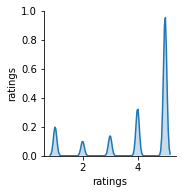

In [8]:
import seaborn as sns
sns.pairplot(elec_product_df, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edb066160>]],
      dtype=object)

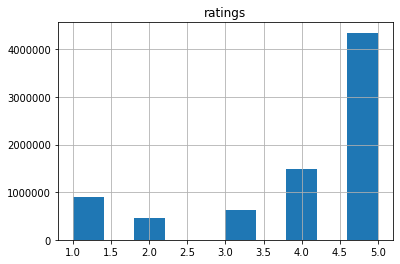

In [9]:
elec_product_df.hist()   # we can see that most of people have given rating 5 to products.Followed by rating 4 and 1.
# moderate number of people have rated products as average rating 2 or 3.

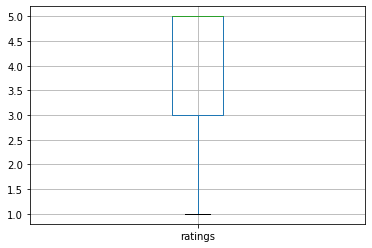

In [10]:
elec_product_df.boxplot()

In [11]:
elec_product_df.isnull().sum()  ## no data here has null ratings.

userId       0
productId    0
ratings      0
dtype: int64

In [0]:
elec_product_subset_df=elec_product_df[0:7824482]   # considerring all the rows in dataset to start with, 
                                                    ## might have to reduce the size if compute issue

In [13]:
elec_product_subset_df['userId'].unique().shape ## there are 4201696 unique users in orignal dataset

(4201696,)

In [14]:
elec_product_subset_df.groupby('userId')['ratings'].count().sort_values(ascending=False).head()  

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: ratings, dtype: int64

In [15]:
elec_product_subset_df.groupby('userId')['ratings'].count().sort_values(ascending=False).shape   ## (4201696,)

(4201696,)

In [16]:
## We have huge number of records , so considerring only those users who have rated at least 50 or more ratings for products.
elec_product_subset_df.groupby('userId')['ratings'].count().sort_values(ascending=False).head(n=1500)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
AA8RBTN3J2F5H      50
A3KTWUXXB8KKC7     50
A1IU4UAV9QIJAI     50
A3SP7T2PZ3HSDE     50
A17RFKCYS69M3Y     50
Name: ratings, Length: 1500, dtype: int64

In [0]:
most_rated_userId= pd.DataFrame(elec_product_subset_df.groupby('userId')['ratings'].count().sort_values(ascending=False).head(n=1500))

In [18]:
most_rated_userId.shape

(1500, 1)

In [0]:
most_rated_userId=most_rated_userId.reset_index()   # resetting index to make userId as column 

In [20]:
most_rated_userId.columns

Index(['userId', 'ratings'], dtype='object')

In [21]:
most_rated_userId['userId'].unique().shape

(1500,)

In [22]:
pd.DataFrame(elec_product_subset_df[elec_product_subset_df["userId"].isin(most_rated_userId["userId"])])

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [0]:
## now we have list of those users, who have rated atleast 50 products.
elec_product_subset2_df=elec_product_subset_df[elec_product_subset_df["userId"].isin(most_rated_userId["userId"])]

In [24]:
## we will work on elec_product_subset2_df
elec_product_subset2_df.userId.shape   ## the number of users is now reduced to 123871 from 42,01,696

(123871,)

In [25]:
elec_product_subset2_df.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [26]:
elec_product_subset2_df.groupby('productId')['ratings'].mean().head()   ## finding the average rating given for a product, by selected users

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    5.000000
1400501466    3.333333
Name: ratings, dtype: float64

In [27]:
## Here to see what all products have got best rating i.e 5 , picking top 5 (head) of them
elec_product_subset2_df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QWKSX4    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
B002R0T03Y    5.0
Name: ratings, dtype: float64

In [28]:
## we can also, consider recommending those products that have got maximun times ratings, 
elec_product_subset2_df.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    205
B003ES5ZUU    179
B000N99BBC    164
B007WTAJTO    159
B00829TIEK    149
Name: ratings, dtype: int64

## Combining the both cases, of best rating and max number of ratings being given by set of users, we can recommend the products
### BASED ON POPULARITY

In [0]:
Pr_ratings_mean_count = pd.DataFrame(elec_product_subset2_df.groupby('productId')['ratings'].mean()) 
Pr_ratings_mean_count['rating_counts'] = pd.DataFrame(elec_product_subset2_df.groupby('productId')['ratings'].count().sort_values(ascending=False))  

In [30]:
Pr_ratings_mean_count.sort_values(by="rating_counts",ascending=False).head()  ## Top 5 recommendations based on Popularity.

,ratings,rating_counts
productId,,
B0088CJT4U,4.214634,205
B003ES5ZUU,4.860335,179
B000N99BBC,4.774390,164
B007WTAJTO,4.698113,159
B00829TIEK,4.436242,149


In [0]:
## the above model have a limitation that it is not personalised. SO to capture the user's interst based RECOMMENDATIONS,We need to 
## Build Collaborative Filtering model.

## we would use Suprise lib for it, to do a user- user collaborative filterring first.

In [32]:
pip install scikit-surprise

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [0]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))

In [0]:
# Picking the first Loaded the ratings_electronics dataset in Suprise dataset format.  userId::productId::Ratings
data = Dataset.load_from_df(elec_product_subset2_df[['userId', 'productId', 'ratings']], reader)

## splitting it into train and test data 70:30 ratio
trainset, testset = train_test_split(data, test_size=.30)

In [36]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [37]:
# we can now query for specific predicions
uid = str(196)  # raw user id
iid = str(302)  # raw product id
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 196        item: 302        r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [0]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [39]:
test_pred[0:10]  

[Prediction(uid='A1NAA1R38JSNHV', iid='B0034JLTNG', r_ui=5.0, est=4.571428571428571, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1ODOGXEYECQQ8', iid='B00008OE46', r_ui=5.0, est=4.325842696629214, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1R3GN9MEJFXM3', iid='B004286VMW', r_ui=5.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A1435P5AMCPB3X', iid='B00008N6XL', r_ui=4.0, est=4.262221914680137, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B0000CH58M', r_ui=4.0, est=3.9761904761904763, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1X2LENOF84LCQ', iid='B001NPEB5Q', r_ui=4.0, est=3.94542596935626, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3DOPYDOS49I3T', iid='B0010Y414Q', r_ui=5.0, est=4.904761904761905, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1SDPA1J98UP4L', iid='B

### Getting RMSE


In [40]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)  ### root Mean Square error RMSE

User-based Model : Test Set
RMSE: 1.0570


1.057031272419681

In [41]:
accuracy.mse(test_pred, verbose=True)  ## mean square error

MSE: 1.1173


1.1173151108731703

In [42]:
accuracy.mae(test_pred, verbose=True)  ## mean Absolute error

MAE:  0.7782


0.778192921181348

## Let us try to run Item item Collaborative on same data

In [0]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
#algo = KNNWithMeans(k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
# algo.fit(trainset)

## NOTE :this on running on local threw memory error and on collab kernal crashed .Hence commenting below code, and moving 
## onto other collaborative filterring methods and algos.

In [0]:
# run the trained model against the testset
# test_pred = algo.test(testset)

In [0]:
# print("Item-Item Model : Test Set")
# accuracy.rmse(test_pred, verbose=True)  ### root Mean Square error RMSE

## Using Collaborative filterring user Other algo in suprise like SVD, if it gives lesser RMSE

In [46]:
from surprise import SVD, accuracy
algo3 = SVD()
algo3.fit(trainset)

In [0]:
# run the trained model against the testset
test_pred = algo3.test(testset)

In [48]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)  ### root Mean Square error RMSE

User-based Model : Test Set
RMSE: 0.9840


0.9839903362560541

#### Using BaseLine Algo of suprise, for Lesser RMSE

In [49]:
from surprise import BaselineOnly
print('Using ALS')

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo4 = BaselineOnly(bsl_options=bsl_options)
predictions = algo4.fit(trainset).test(testset)
accuracy.rmse(predictions)

Using ALS
Estimating biases using als...
RMSE: 0.9780


0.9780005529353443

## Generating top 5 recommendations


In [0]:
testset_new = trainset.build_anti_testset()

In [51]:
len(testset_new)

56733291

In [52]:
testset_new[0:5]   ## let us see the testset

[('A1X1CEGHTHMBL1', 'B000OLDG60', 4.262221914680137),
 ('A1X1CEGHTHMBL1', 'B00335LX9G', 4.262221914680137),
 ('A1X1CEGHTHMBL1', 'B00A8O0710', 4.262221914680137),
 ('A1X1CEGHTHMBL1', 'B009D1UWUA', 4.262221914680137),
 ('A1X1CEGHTHMBL1', 'B0084L73QQ', 4.262221914680137)]

In [0]:
predictions = algo4.test(testset_new[0:20000000])   ## Lets run and recommend the products for 2,00,00,000 users of trainset.

In [0]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [0]:
predictions_df.columns = ["userId","productId","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [56]:
predictions_df

,userId,productId,est_rating
7939309,AZMY6E8B52L2T,B005KAK2FI,5.000000
7939353,AZMY6E8B52L2T,B000M5U9GI,5.000000
7939468,AZMY6E8B52L2T,B001TUYTZM,5.000000
7939490,AZMY6E8B52L2T,B00C20KWP4,5.000000
7939500,AZMY6E8B52L2T,B003CJTQJC,5.000000
...,...,...,...
5487489,A100UD67AHFODS,B001F50UDG,3.047587
5490969,A100UD67AHFODS,B004OBUFYW,3.003009
5483392,A100UD67AHFODS,B007GR44PM,2.944501
5482070,A100UD67AHFODS,B000UF3FT8,2.891766


In [0]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)  ## top 5 products for a userid.

In [58]:
top_5_recos[0:11]

,userId,productId,est_rating
0,AZMY6E8B52L2T,B005KAK2FI,5.000000
1,AZMY6E8B52L2T,B000M5U9GI,5.000000
2,AZMY6E8B52L2T,B001TUYTZM,5.000000
3,AZMY6E8B52L2T,B00C20KWP4,5.000000
4,AZMY6E8B52L2T,B003CJTQJC,5.000000
5,AZCE11PSTCH1L,B000JV9LUK,4.983104
6,AZCE11PSTCH1L,B001TH7T2U,4.967786
7,AZCE11PSTCH1L,B000M2TAN4,4.936054
8,AZCE11PSTCH1L,B0052SCU8U,4.934658
9,AZCE11PSTCH1L,B0010Z28XG,4.929424


In [59]:
## so for user id at 0th row, if we want to see top 5 recommendations,
top_5_recos[top_5_recos["userId"]==top_5_recos.userId[0]]

,userId,productId,est_rating
0,AZMY6E8B52L2T,B005KAK2FI,5.0
1,AZMY6E8B52L2T,B000M5U9GI,5.0
2,AZMY6E8B52L2T,B001TUYTZM,5.0
3,AZMY6E8B52L2T,B00C20KWP4,5.0
4,AZMY6E8B52L2T,B003CJTQJC,5.0


In [0]:
### so based on user's ratings and behavour of purchase, we have sugegsted them new products to them.

## Conclusion:
###### We had **7824482** records, 4 columns (userId,ProductId,Ratings, Timestamp) in orignal dataset.
###### For our model we dropped timestamp and found **users who have rated at least 50 products.**
Note: There were 4201696 unique users in orignal data set given.
###### Then trained the popularity model on those **123871** Users records, who have rated 50 or more products.
###### Then we built the **user-user collaborative filterring model**. The **RMSE** we have got on Test data(30% of trainset) is rmse 1.0504.We also found **MAE =0.70, MSE=1.098** over this Test data.
###### Then **we recommended 5 products for 2,00,00,000 users of Anti-trainset**.

Further to it, **we tried, SVD()** for collab flterring and got a lesser **RMSE of 0.98**. 
I could again reduce the RMSE using **BaseLineOnly**() algo of Collab filterring, to **0.97**. 

###### Here overall, we started from recommending using generic popularity model. But that was not personalised for users hence we moved to user -user Collaborative filterring model where based on purchase behaviour of user, we suggested him/her other similar and high rated products.
###### However, **for New products, Collaborative filterring might suffer from Cold start problem, since we wont have any rating at all, for that product. Hence, in that case we might have to go back, for Popularity model to recommend products**.